In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
X_train = pd.read_csv('X_train_YG7NZSq.csv',index_col=0)

In [4]:
Y_train = pd.read_csv('Y_train_wz11VM6.csv',index_col=0)

In [13]:
X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ]).dropna()
X_train_reshape.columns = pd.Index(range(1,251), name='timeLag')

/tmp/ipykernel_45335/1445278640.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ]).dropna()
/tmp/ipykernel_45335/1445278640.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ]).dropna()
/tmp/ipykernel_45335/1445278640.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for d

In [14]:
X_train_reshape

     stocksID
1    0          -0.018647
     1          -0.008254
     2          -0.008404
     3          -0.022734
     4          -0.024546
                   ...   
753  45         -0.001315
     46         -0.001580
     47         -0.001053
     48         -0.003321
     49         -0.004808
Length: 7856250, dtype: float64

In [11]:
X_train.T.shift(1).stack(dropna=False)

/tmp/ipykernel_45335/210451532.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  X_train.T.shift(1).stack(dropna=False)


     stocksID
0    0                NaN
     1                NaN
     2                NaN
     3                NaN
     4                NaN
                   ...   
753  45          0.009786
     46         -0.008842
     47         -0.008607
     48         -0.007519
     49         -0.002816
Length: 37700, dtype: float64

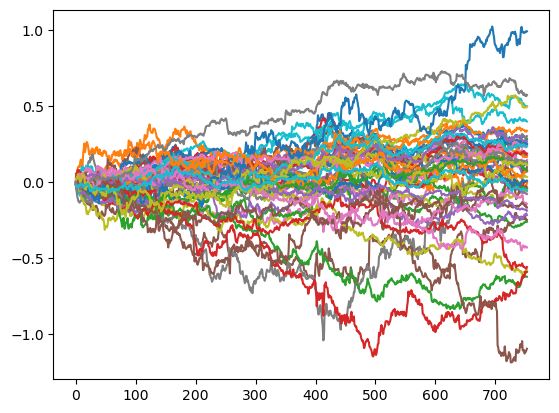

In [6]:
X_train.T.cumsum().plot(legend=False)
plt.show()

In [ ]:
X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ], 1).dropna()
X_train_reshape.columns = pd.Index(range(1,251), name='timeLag')

In [15]:
def autoRegA(D=250,F=10):
    A=np.zeros((D,F))
    for i in range(F):
        A[i,i]=1
    return A

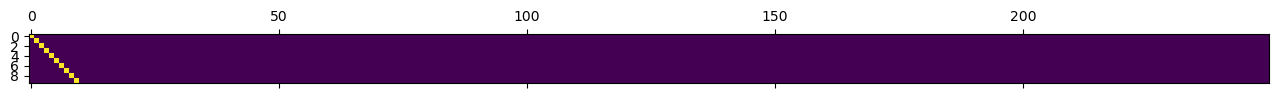

In [17]:
a=autoRegA()
plt.matshow(a.T)

In [18]:
def randomA(D=250, F=10):  
    
    M = np.random.randn(D,F)
    randomStiefel = np.linalg.qr(M)[0] # Apply Gram-Schmidt algorithm to the columns of M
    
    return randomStiefel

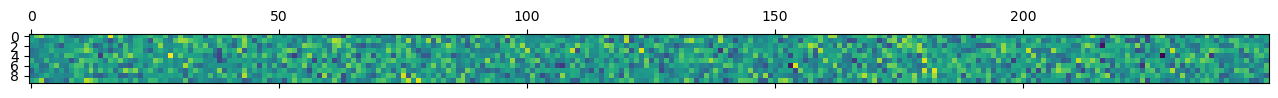

In [19]:
A = randomA()
plt.matshow(A.T)
plt.show()

In [20]:
# to check the orthonormality constraints as in the metric:
    
def checkOrthonormality(A): 
    
    bool = True
    D, F = A.shape   
    Error = pd.DataFrame(A.T @ A - np.eye(F)).abs()
    
    if any(Error.unstack() > 1e-6):
        bool = False
     
    return bool

In [21]:
checkOrthonormality(A)

True

In [22]:
def metric_train(A, beta): 
    
    if not checkOrthonormality(A):
        return -1.0    
    
    Ypred = (X_train_reshape @ A @ beta).unstack().T         
    Ytrue = Y_train
    
    Ytrue = Ytrue.div(np.sqrt((Ytrue**2).sum()), 1)    
    Ypred = Ypred.div(np.sqrt((Ypred**2).sum()), 1)

    meanOverlap = (Ytrue * Ypred).sum().mean()

    return  meanOverlap  